<a href="https://colab.research.google.com/github/Ahmed-Shatla/Pistachio-classification-Transfer-Learning-MobileNetV2/blob/main/Pistachio_classification(Transfer_Learning)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
import tensorflow as tf
import cv2


In [2]:
train_dataGen = ImageDataGenerator(rescale= 1./255.0,
                                   validation_split=0.1,
                                   rotation_range=20,
                                   horizontal_flip=True)
test_dataGen = ImageDataGenerator(rescale= 1./255.0)


In [3]:
train_imgs_path = "/content/drive/MyDrive/Pistachio_ds/Train"
test_imgs_path = "/content/drive/MyDrive/Pistachio_ds/Test"

In [4]:
train_Gen = train_dataGen.flow_from_directory(train_imgs_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,
                                              class_mode='categorical',
                                              subset='training'
                                              )
valid_Gen = train_dataGen.flow_from_directory(train_imgs_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,
                                              class_mode='categorical',
                                              subset='validation'
                                              )
test_dataGen = train_dataGen.flow_from_directory(test_imgs_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,
                                              class_mode='categorical'

                                              )

Found 1682 images belonging to 2 classes.
Found 186 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


This data small and different

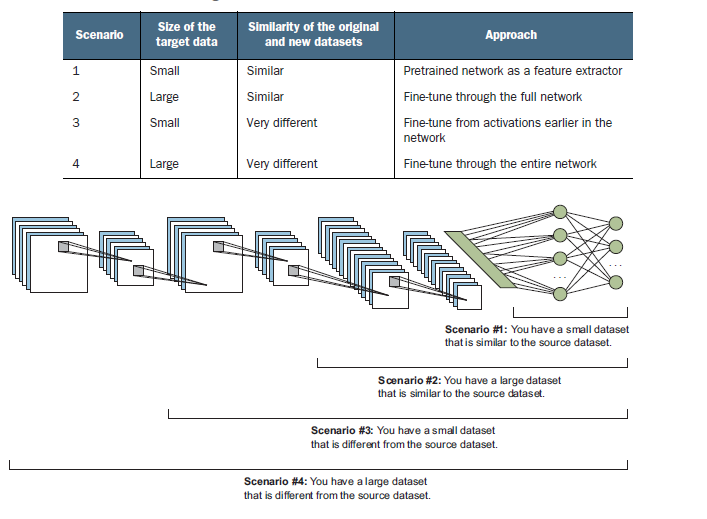

In [5]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
  if layer.name != 'Conv1' or layer.name != 'bn_Conv1' or layer.name != 'Conv1_relu':
    layer.trainable = False
  else:
    layer.trainable = True

x = base_model.output
x = MaxPooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [6]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
import keras
early_stopping = keras.callbacks.EarlyStopping( monitor='val_accuracy',patience=5)
model.fit(
    train_Gen,
    epochs=20,
    batch_size=64,
    validation_data=valid_Gen,
    callbacks= [early_stopping],
    verbose=2
)

Epoch 1/20


ValueError: ignored